# A11 - Integración Montecarlo

**1.-** Se tiene la siguiente ecuación diferencial:

In [13]:
def montecarlo_tipo1(f,a,b,n) : 
    u = np.random.uniform(a,b,n)
    return np.mean(f(u)*(b-a))

In [89]:
def f(x):
    return np.log(1.5+ np.sin(x**2))/(x*np.exp(-x**2))

int1 = montecarlo_tipo1(f,0.1,0.3,1000000)

In [91]:
int2 = montecarlo_tipo1(f,0.3,0.5,1000000)

In [93]:
int3 = montecarlo_tipo1(f,0.5,0.7,1000000)

In [95]:
int4 = montecarlo_tipo1(f,0.7,0.9,1000000)

In [97]:
int5 = montecarlo_tipo1(f,0.9,1.1,1000000)

**a)** Integra los siguientes intervalos utilizando 1 millón de muestras. Escribe los resultados en un DataFrame de pandas.

In [99]:
import pandas as pd 
renglones =[]
tabla = pd.DataFrame()
tabla.loc[0,"intervalos1"]= int1
tabla.loc[0,"intervalos2"]= int2
tabla.loc[0,"intervalos3 "]= int3
tabla.loc[0,"intervalos4 "]= int4
tabla.loc[0,"intervalos5 "]= int5

tabla

,intervalos1,intervalos2,intervalos3,intervalos4,intervalos5
0,0.489805,0.30214,0.296817,0.353366,0.465386


 ![](a11_01.png):

**b)** Usa el teorema fundamental del cálculo para escribir la secuencia de valores para y(x):

In [127]:
y_03 = 0.1 +int1
y_03

0.5898050937724091

In [129]:
y_05 = y_03 +int2
y_05

0.8919446830160462

In [131]:
y_07 = y_05 +int3
y_07

1.1887617815650229

In [133]:
y_09 = y_07+int
y_09

1.5421277248578147

In [135]:
y_11= y_09 +int5
y_11

2.007513400822919

 ![](imagen_11.png):

    Puntos   Área f1   Área f2  Error Relativo f1  Error Relativo f2
0    10000  3.742400  6.425600           0.010739           0.430345
1   100000  3.658240  6.408960           0.002422           0.427743
2  1000000  3.674224  6.384416           0.000078           0.423904


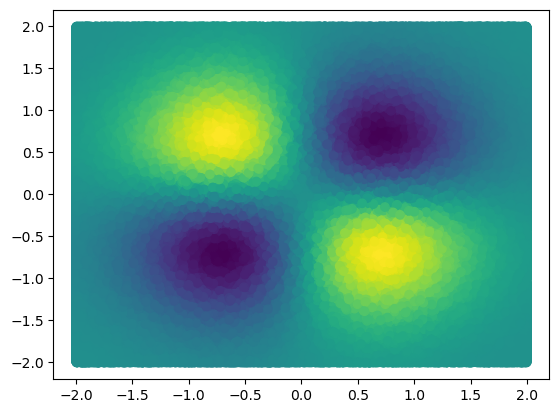

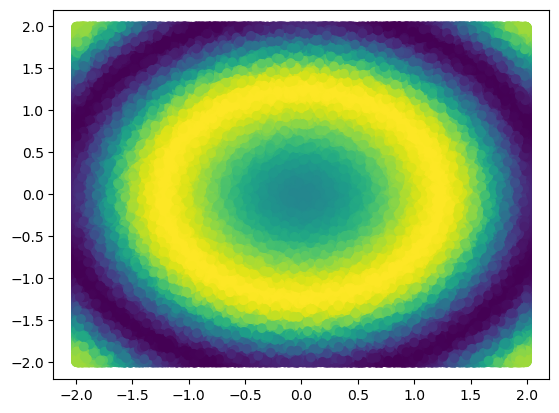

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def desigualdad_f1(x, y):
    return -x * y * np.exp(-x**2 - y**2)

def desigualdad_f2(x, y):
    return np.exp(-0.05 * (x**2 + y**2)) * np.sin(x**2 + y**2)

v1 = 0.05
v2 = 0.5

def region_f1(x, y):
    return f1(x, y) > v1

def region_f2(x, y):
    return f2(x, y) > v2


def montecarlo_tipo_2(region, ax, bx, ay, by, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    AR = (bx - ax) * (by - ay)
    return region(x, y).mean() * AR


ax, bx = -2, 2
ay, by = -2, 2

puntos = [10_000, 100_000, 1_000_000]
resultados = []

for n in puntos:
    area_f1 = montecarlo_tipo_2(region_f1, ax, bx, ay, by, n)
    area_f2 = montecarlo_tipo_2(region_f2, ax, bx, ay, by, n)
    resultados.append([n, area_f1, area_f2])

area_f1_1millon = resultados[-1][1]
area_f2_1millon = resultados[-1][2]

df['Error Relativo f1'] = np.abs(df['Área f1'] -area_f1_1millon) / area_f2_1millon
df['Error Relativo f2'] = np.abs(df['Área f2'] -area_f1_1millon) / area_f2_1millon
print(df)

x=np.random.uniform(ax,bx,n)
y=np.random.uniform(ay,by,n)
plt.figure()
plt.scatter(x,y,c=desigualdad_f1(x,y))


x=np.random.uniform(ax,bx,n)
y=np.random.uniform(ay,by,n)
plt.figure()
plt.scatter(x,y,c=desigualdad_f2(x,y))

no se porque me dan asi las graficas 